In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier


/var/folders/kq/22rtshv9635518wrmfbx3l1r0000gn/T/ipykernel_86682/4138285723.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
CrashData_df = pd.read_csv("CrashData_df.csv")
CrashData_df.head()

,Collision_Type,Weather,Surface_Condition,Light,Driver_Substance_Abuse,Driver_At_Fault,Vehicle_Body_Type,Speed_Limit,Vehicle_Year,Vehicle_Make,Vehicle_Model,General_Vehicle_Type
0,OTHER,CLEAR,NaN,DAYLIGHT,UNKNOWN,1.0,PASSENGER CAR,15,2004,HONDA,TK,Car
1,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NONE DETECTED,0.0,PASSENGER CAR,40,2011,GMC,TK,Car
2,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NONE DETECTED,1.0,PICKUP TRUCK,35,2019,FORD,F150,Truck
3,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,NONE DETECTED,1.0,PASSENGER CAR,40,2016,KIA,SW,Car
4,HEAD ON LEFT TURN,CLOUDY,DRY,DAYLIGHT,NONE DETECTED,1.0,(SPORT) UTILITY VEHICLE,35,2016,TOYT,TK,SUV


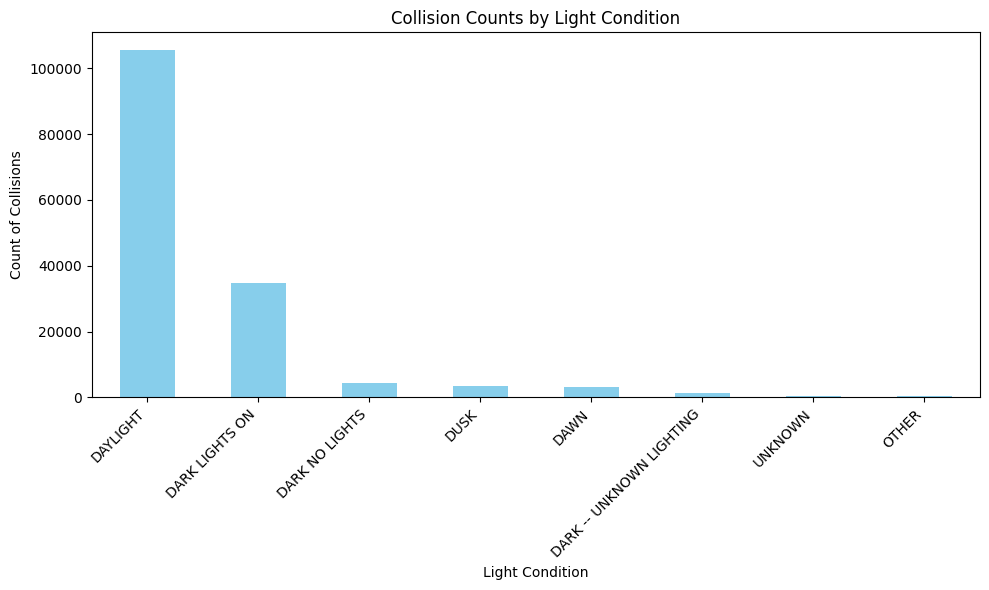

In [3]:
import matplotlib.pyplot as plt

light_counts = CrashData_df['Light'].value_counts()

plt.figure(figsize=(10, 6))
light_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Light Condition")
plt.ylabel("Count of Collisions")
plt.title("Collision Counts by Light Condition")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

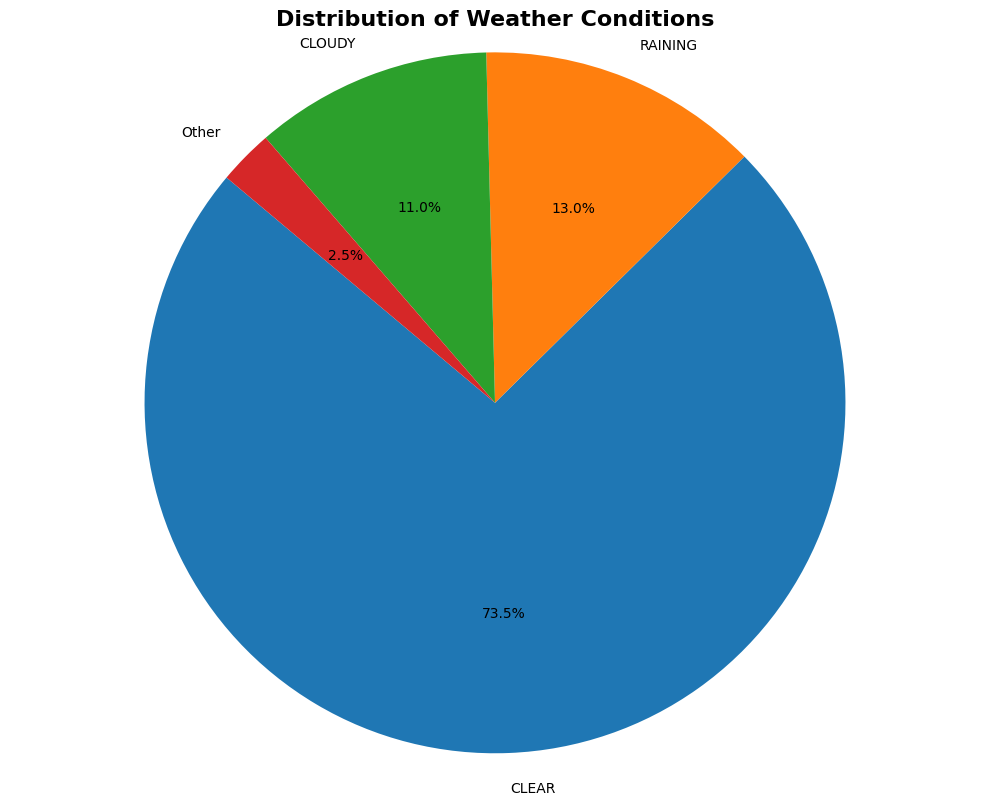

In [4]:
weather_counts = CrashData_df['Weather'].value_counts()

threshold = 5

total_count = weather_counts.sum()

filtered_counts = weather_counts[weather_counts / total_count * 100 >= threshold]
other_count = weather_counts[weather_counts / total_count * 100 < threshold].sum()
filtered_counts['Other'] = other_count

plt.figure(figsize=(10, 8))
plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Distribution of Weather Conditions', fontsize=16, fontweight='bold')
plt.axis('equal') 

plt.tight_layout()

plt.show()

# Illegal Substance Factor by Light Condition

In [5]:
dui_data = CrashData_df[CrashData_df['Driver_Substance_Abuse'] != 'Unknown']

In [6]:
proportion_by_light = dui_data.groupby('Light')['Driver_Substance_Abuse'].value_counts(normalize=True).unstack().fillna(0)

<Figure size 1200x600 with 0 Axes>

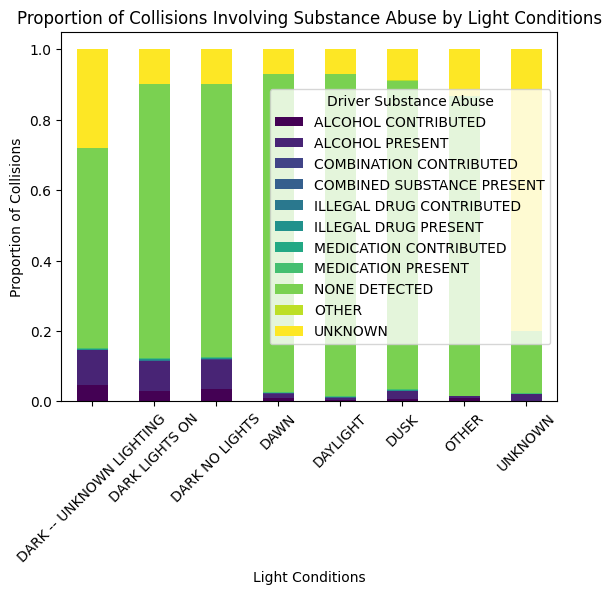

In [7]:
plt.figure(figsize=(12, 6))
proportion_by_light.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Proportion of Collisions Involving Substance Abuse by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Proportion of Collisions')
plt.xticks(rotation=45)
plt.legend(title='Driver Substance Abuse')
plt.show()

# Anova 1: Does the Weather Condition Impact Speed Limit?

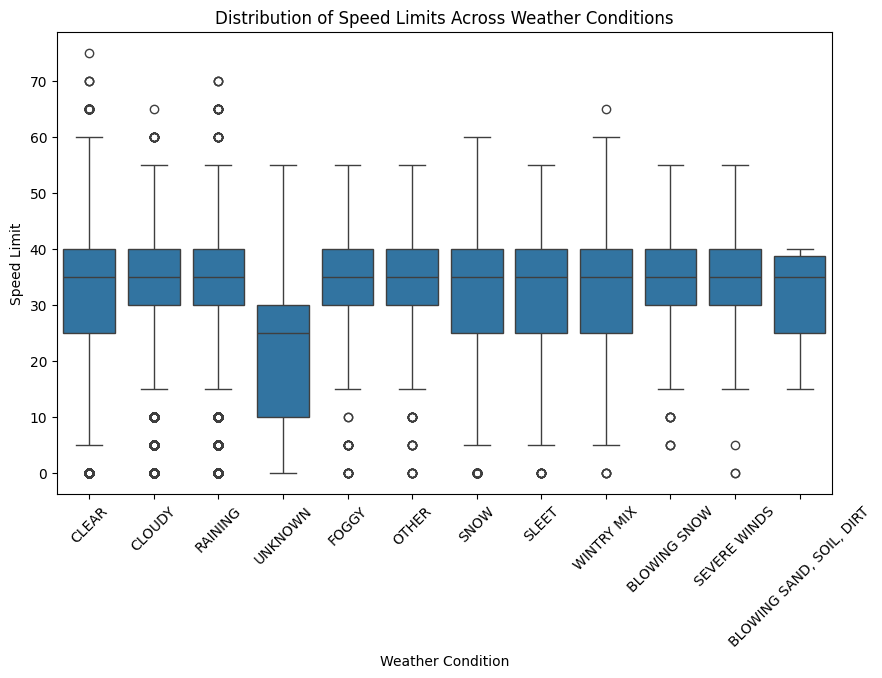

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Speed_Limit', data=CrashData_df)
plt.title('Distribution of Speed Limits Across Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Speed Limit')
plt.xticks(rotation=45)
plt.show()

In [9]:
from scipy.stats import f_oneway

In [10]:
print(CrashData_df['Weather'].unique())

['CLEAR' 'CLOUDY' 'RAINING' 'UNKNOWN' 'FOGGY' 'OTHER' 'SNOW' 'SLEET'
 'WINTRY MIX' 'BLOWING SNOW' 'SEVERE WINDS' 'BLOWING SAND, SOIL, DIRT']


In [11]:
weather_groups = []
for weather_condition in CrashData_df['Weather'].unique():
    weather_groups.append(CrashData_df[CrashData_df['Weather'] == weather_condition]['Speed_Limit'])


In [12]:
f_statistic, p_value = f_oneway(*weather_groups)

In [13]:
print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 92.7474472074871
p-value: 4.429550721255834e-211


In [14]:
if p_value < 0.05:
    print("The p-value is less than 0.05, so there is a significant difference in speed limits across different weather conditions.")
else:
    print("The p-value is greater than or equal to 0.05, so there is no significant difference in speed limits across different weather conditions.")

The p-value is less than 0.05, so there is a significant difference in speed limits across different weather conditions.


# Anova 2: Is There a Relation Between Drunk Driving and Being at Fault? 

In [15]:
from scipy.stats import chi2_contingency

In [16]:
contingency_table = pd.crosstab(CrashData_df['Driver_Substance_Abuse'], CrashData_df['Driver_At_Fault'])

In [17]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

In [18]:
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square statistic: 11664.574754790121
p-value: 0.0


In [19]:
if p_value < 0.05:
    print("The p-value is less than 0.05, so there is a significant association between driver substance abuse and driver fault.")
else:
    print("The p-value is greater than or equal to 0.05, so there is no significant association between driver substance abuse and driver fault.")

The p-value is less than 0.05, so there is a significant association between driver substance abuse and driver fault.


# Anova 3: Do Driver's at Fault Have a Tendency to Drive Older Vehicles?

In [20]:
CrashData_df = CrashData_df[CrashData_df['Vehicle_Year'].between(1900, 2024)] 

CrashData_df['Vehicle_Year'] = CrashData_df['Vehicle_Year'].astype('category')

In [21]:
contingency_table = pd.crosstab(CrashData_df['Vehicle_Year'], CrashData_df['Driver_At_Fault'])

In [22]:
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

In [23]:
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

Chi-square statistic: 1158.2857345093353
p-value: 2.279134155953711e-197


In [24]:
if p_value < 0.05:
    print("The p-value is less than 0.05, so there is a significant association between the year the vehicle was made and driver fault.")
else:
    print("The p-value is greater than or equal to 0.05, so there is no significant association between the year the vehicle was made and driver fault.")

The p-value is less than 0.05, so there is a significant association between the year the vehicle was made and driver fault.


# Heatmap: Substance Abuse by Vehicle Type 

In [25]:
import seaborn as sns

In [26]:
ctab = pd.crosstab(CrashData_df['Driver_Substance_Abuse'], CrashData_df['General_Vehicle_Type'])

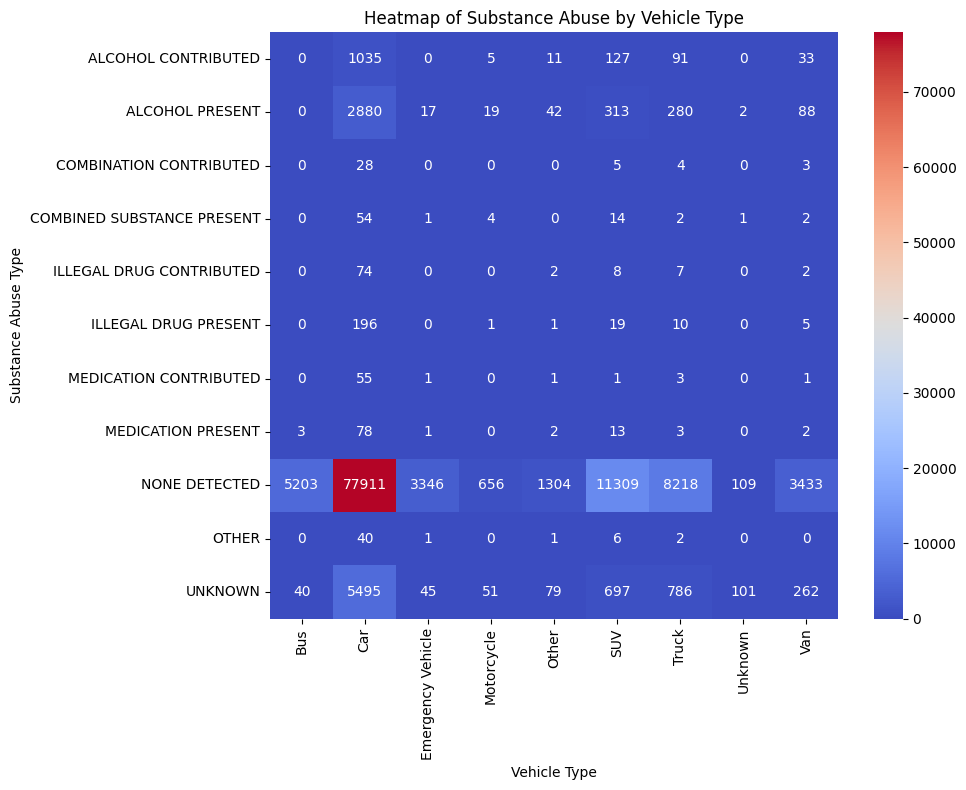

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(ctab, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Substance Abuse by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Substance Abuse Type')
plt.tight_layout() 
plt.show()

# Gradiant Boost

In [28]:
CrashData_df = pd.get_dummies(CrashData_df, columns=['Weather', 'Collision_Type', 'Surface_Condition', 'Light', 'Driver_Substance_Abuse', 'Vehicle_Body_Type', 'General_Vehicle_Type', 'Vehicle_Make', 'Vehicle_Model'], drop_first=True)

In [29]:
subsampled_data = CrashData_df.sample(frac=0.2, random_state=42) 

In [30]:
X = CrashData_df.drop('Driver_At_Fault', axis=1)
y = CrashData_df['Driver_At_Fault']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
gb_clf = GradientBoostingClassifier(n_estimators=5, random_state=42)
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=5, random_state=42)

In [33]:
feature_importances = gb_clf.feature_importances_

In [34]:
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

In [35]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

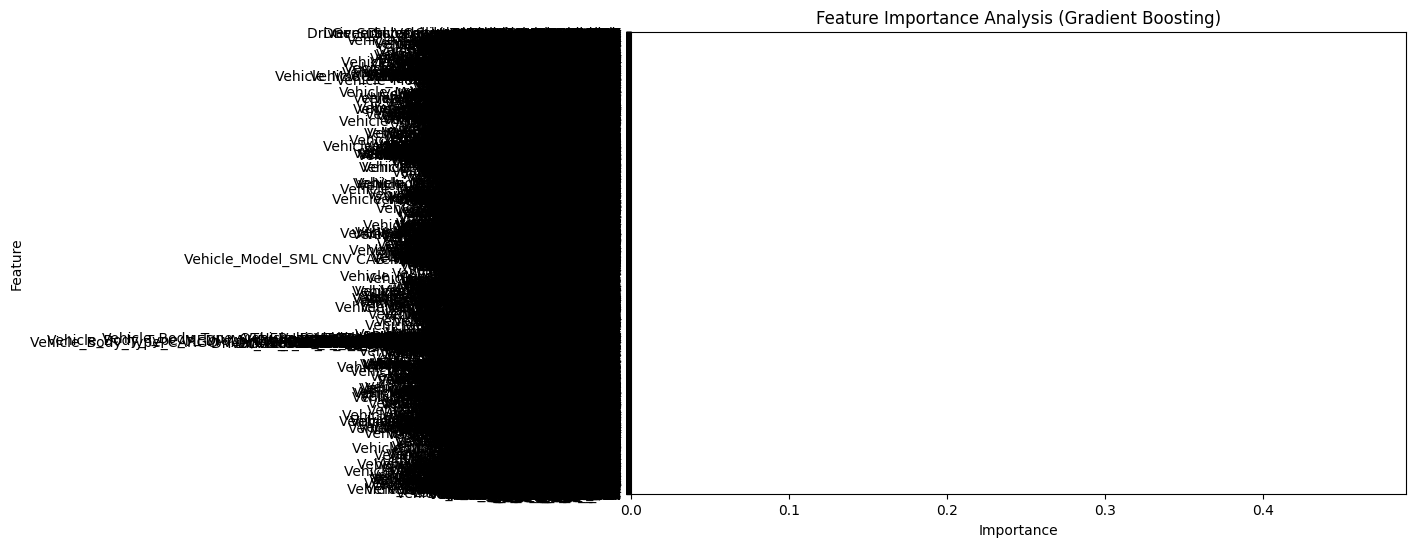

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance Analysis (Gradient Boosting)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Deceision Tree

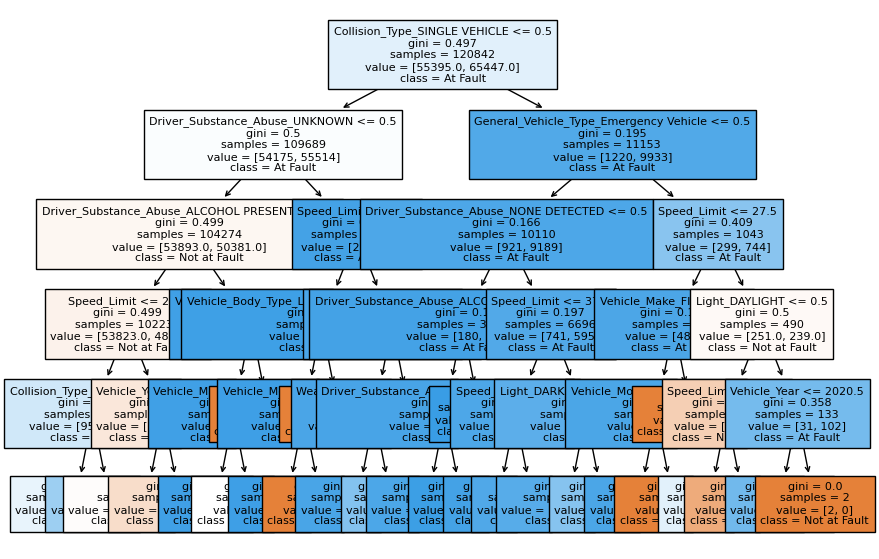

In [37]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)
plt.figure(figsize=(10, 7))  
plot_tree(tree_clf, feature_names=X.columns, class_names=['Not at Fault', 'At Fault'], filled=True, fontsize=8)
plt.show()